In [1]:
%pylab inline
import pandas as pd
from scipy import linalg
from itertools import combinations

import scipy.io as io
from scipy.io import mmread
import scipy.sparse as sparse
from sklearn.tree import DecisionTreeClassifier

Populating the interactive namespace from numpy and matplotlib



# Homework 3
## Homework guideline

- This is a group homework. Your group only needs to submit one homework. You can form a group of 1, 2 or 3.


- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point.

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to.

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources. But you
must understand, write, and hand in your own answers. In addition, you must write and submit
your own code in the programming part of the assignment (we may run your code).
If you copy someone else homework solution, both of you may receive ZERO point.

- **Late assignments:** Recognizing that students may face unusual circumstances and require some flexibility in the course of the semester, each student will have a total of 7 free late (calendar) days to use as s/he sees fit, but no more than 4 late days can be used on any single assignment. Late days are counted at the granularity of days: e.g., 3 hours late is one late day.  

- **You must write your own code and fill in the your answer in the text box.** If you fail to do either of that, you will receive zero point.



**Your group member:**

- Neeraj Namani - 001616313
- Gayathri Srujana - 001615025
- Anish Reddy Yellakonda - 001607588



---



---


#Q1:  Soft margin SVM (50pt)

In the problem, you will implement the soft margin SVM using different gradient descent methods. Our
goal for this problem is to investigate the convergence of different gradient descent methods on a sample dataset and think about the characteristics of these different methods that lead to different performances.

To recap, given a dataset of $n$
samples $\mathcal{D} =
\left\{\left(\mathbf{x}^{(i)},
y^{(i)}\right)\right\}_{i=1}^n$, where every $d$-dimensional feature vector $\mathbf{x}^{(i)} \in \mathbb{R}^d$ is
associated with a label $y^{(i)} \in
\{-1,1\}$, to estimate the parameters $\boldsymbol{\theta} = (\mathbf{w}, b)$
of the soft margin SVM, we can minimize the loss function:

\begin{aligned}
f(\mathbf{w},b; \mathcal{D}) &= \frac{1}{2}
\|\mathbf{w}\|_2^2 + C \sum_{(\mathbf{x}^{(i)}, y^{(i)}) \in
\mathcal{D}} \max\left\{0, 1 - y^{(i)}( \mathbf{w}\cdot
\mathbf{x}^{(i)} + b )\right\} \\
&= \frac{1}{2} \|\mathbf{w}\|_2^2 + C
\sum_{(\mathbf{x}^{(i)}, y^{(i)}) \in \mathcal{D}}
L(\mathbf{x}^{(i)}, y^{(i)}; \boldsymbol{\theta})
\end{aligned}

In order to minimize the function, we first obtain the gradient with
respect to $\boldsymbol{\theta}$. The
partial derivative with respect to $w_j$, the $j$-th entry in the vector $\mathbf{w}$, is:

\begin{aligned}
    \partial_{w_j} f(\mathbf{w},b; \mathcal{D}) =
    \frac{\partial f(\mathbf{w},b; \mathcal{D})}{\partial w_j} =
    w_j + C \sum_{(\mathbf{x}^{(i)}, y^{(i)}) \in \mathcal{D}}
\frac{\partial L(\mathbf{x}^{(i)}, y^{(i)};
\boldsymbol{\theta})}{\partial w_j}
\end{aligned}
where

\begin{aligned}
\frac{\partial L(\mathbf{x}^{(i)}, y^{(i)};
\boldsymbol{\theta})}{\partial w_j} =     
\left\{\begin{array}{cl}
      0 & \text{if}\  y^{(i)}\left(\mathbf{w} \cdot
\mathbf{x}^{(i)} + b \right) \ge 1 \\
      -y^{(i)}x_j^{(i)} & \text{otherwise.}
    \end{array}\right.
\end{aligned}
and the partial derivative with respect to $b$ is
\begin{aligned}
\partial_b f(\mathbf{w},b;\mathcal{D})  =
\frac{\partial f(\mathbf{w},b;\mathcal{D})}{\partial b} =
C \sum_{(\mathbf{x}^{(i)}, y^{(i)}) \in \mathcal{D}} \frac{\partial
L(\mathbf{x}^{(i)}, y^{(i)}; \boldsymbol{\theta})}{\partial b}
\end{aligned}
where
\begin{aligned}
\frac{\partial L(\mathbf{x}^{(i)}, y^{(i)};
\boldsymbol{\theta})}{\partial b} =     
\left\{\begin{array}{cl}
      0 & \text{if}\  y^{(i)}\left(\mathbf{w} \cdot
\mathbf{x}^{(i)} + b \right) \ge 1 \\
      -y^{(i)} & \text{otherwise.}
    \end{array}\right.
\end{aligned}

Since the direction of the gradient is the
direction of steepest ascent of the loss function, gradient descent
proceeds by iteratively taking small steps along the direction opposite
to the direction of gradient. The general framework of gradient descent
is given in following Algorithm.

<img src="https://github.com/yexf308/AppliedStatistics/blob/main/Homework/HW2/algorithm.png?raw=true" width="500" />


**Task**:

1. Implement the SVM algorithm using
the following gradient descent variants.
For all the variants use $C =
100, \mathbf{w}^{(0)} =
\mathbf{0}, b^{(0)} =
0$. For all other parameters, use the values specified in the
description of the variant.

2. Run your implementation on the
data set. The data set contains the following
files:
- *features.txt*: Each
line contains the features (comma-separated values) of a single sample.
It has 6414 samples (rows) and 122 features (columns).
- *target.txt* : Each
line contains the target variable ($y = -1$ or $1$) for the corresponding
row in *features.txt*.

3. Plot the value of the loss
function $f(\mathbf{w}^{(t)},b^{(t)};
\mathcal{D})$ vs. the iteration number $t$ starting from $t=0$. Label the plot axes. The diagram
should have graphs from all the three variants on the same plot. Report the total time (wall clock time, as opposed to the number of iterations) each of the gradient descent variants takes to converge. What do you infer from the plots and the time for convergence? Explain using 4-6
sentences.

**Note**: update the parameters $\mathbf{w}$ and $b$ on iteration $t$ using the values computed on iteration
$t-1$. Do not update using values
computed in the current iteration!

In [2]:
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW2/target.txt?raw=true -O target.txt
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW2/features.txt?raw=true -O features.txt

--2024-11-01 17:16:03--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW2/target.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17673 (17K) [text/plain]
Saving to: ‘target.txt’

target.txt          100%[===================>]  17.26K  --.-KB/s    in 0s      

2024-11-01 17:16:03 (71.7 MB/s) - ‘target.txt’ saved [17673/17673]

--2024-11-01 17:16:03--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW2/features.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

In [3]:
features = np.loadtxt('features.txt', delimiter=',')
target = np.loadtxt('target.txt', delimiter=',')
print(features.shape, target.shape)

(6414, 122) (6414,)




---


## Q1.1: Task 1&2:  Batch Gradient Descent (BGD) (15pt)
When the $\beta = n$, in every iteration the
algorithm uses the entire dataset to compute the gradient and update the
parameters.

As a convergence criterion for batch gradient
descent we will use $\Delta_{\% loss}^{(t)}
\le \varepsilon$, where
\begin{aligned}
    \Delta_{\% loss }^{(t)} = \frac{|f(\mathbf{w}^{(t-1)},
b^{(t-1)}; \mathcal{D}) - f(\mathbf{w}^{(t)}, b^{(t)};
\mathcal{D})|}{f(\mathbf{w}^{(t-1)}, b^{(t-1)};
\mathcal{D})}\times100   
\end{aligned}

Set $\eta = 3\cdot10^{-7}$, $\varepsilon = 0.25$.

**Sanity Check 1**: The value of the loss function at iteration
number $t = 0$ must be around
641,400.

In [4]:
# Q1.1 Your code starts here

X = np.loadtxt('features.txt', delimiter=',')
y = np.loadtxt('target.txt', delimiter=',')

# Define the loss function
def compute_loss(w, b, X, y, C):
    hinge_losses = np.maximum(0, 1 - y * (np.dot(X, w) + b))
    return 0.5 * np.dot(w, w) + C * np.sum(hinge_losses)

# Batch Gradient Descent function
def batch_gradient_descent(X, y, C, eta, epsilon):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    loss_history = []

    # Compute initial loss
    loss = compute_loss(w, b, X, y, C)
    print(f'Initial loss: {loss}')

    # Sanity check
    assert np.isclose(loss, 641400, atol=100), "Initial loss is not approximately 641,400."

    iteration = 0
    while True:
        # Compute gradients
        margins = y * (np.dot(X, w) + b)
        indicator = margins < 1
        grad_w = w - C * np.dot(X.T, y * indicator)
        grad_b = -C * np.sum(y * indicator)

        # Update parameters
        w -= eta * grad_w
        b -= eta * grad_b

        # Compute new loss
        new_loss = compute_loss(w, b, X, y, C)
        loss_history.append(new_loss)

        # Check for convergence
        delta_percent_loss = np.abs(loss - new_loss) / loss * 100
        if delta_percent_loss <= epsilon:
            print(f'Converged after {iteration} iterations.')
            print(f'Final loss: {new_loss}')
            break

        # Update loss and iteration count
        loss = new_loss
        iteration += 1

    return w, b, loss_history, iteration

# Parameters for Batch Gradient Descent
C = 100
eta = 3e-7
epsilon = 0.25

# Run Batch Gradient Descent
w, b, loss_history_bgd, iterations_bgd = batch_gradient_descent(X, y, C, eta, epsilon)


Initial loss: 641400.0
Converged after 56 iterations.
Final loss: 258701.31831506777





---


## Q1.2: Task 1&2: Stochastic Gradient Descent (SGD) (15pt)
When $\beta = 1$, in every iteration the
algorithm uses one training sample at a time to compute the gradient and
update the parameters.
As a convergence criterion for stochastic
gradient descent we will use $\Delta_{loss}^{(t)} < \varepsilon$,
where \begin{aligned}
    \Delta_{loss}^{(t)} = \tfrac{1}{2}\Delta_{loss}^{(t-1)} +
\tfrac{1}{2}\Delta_{\% loss}^{(t)},
\end{aligned}
$t$ is the
iteration number, $\Delta_{\%
loss}^{(t)}$ is same as above and
and $\Delta_{loss}^{(0)} = 0$.
Use $\eta = 0.0001, \varepsilon = 0.001$.

In [5]:
# Q1.2 Your code starts here
# Define the loss function
def compute_loss(w, b, X, y, C):
    hinge_losses = np.maximum(0, 1 - y * (np.dot(X, w) + b))
    return 0.5 * np.dot(w, w) + C * np.sum(hinge_losses)

# Stochastic Gradient Descent function
def stochastic_gradient_descent(X, y, C, eta, epsilon):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    loss_history = []

    # Compute initial loss
    loss = compute_loss(w, b, X, y, C)
    print(f'Initial loss: {loss}')

    iteration = 0
    delta_loss = 0  # Initialize Δ_loss^(0)
    while True:
        for i in range(n_samples):
            # Compute gradient for the i-th sample
            margin = y[i] * (np.dot(X[i], w) + b)
            if margin >= 1:
                grad_w = w
                grad_b = 0
            else:
                grad_w = w - C * y[i] * X[i]
                grad_b = -C * y[i]

            # Update parameters
            w -= eta * grad_w
            b -= eta * grad_b

            # Compute new loss
            new_loss = compute_loss(w, b, X, y, C)
            loss_history.append(new_loss)

            # Compute Δ_% loss^(t)
            delta_percent_loss = np.abs(loss - new_loss) / loss * 100

            # Compute Δ_loss^(t)
            delta_loss = 0.5 * delta_loss + 0.5 * delta_percent_loss

            # Check for convergence
            if delta_loss < epsilon:
                print(f'Converged after {iteration} iterations.')
                print(f'Final loss: {new_loss}')
                return w, b, loss_history, iteration

            # Update loss
            loss = new_loss

        iteration += 1

# Parameters for Stochastic Gradient Descent
C = 100
eta = 0.0001
epsilon = 0.001

# Run Stochastic Gradient Descent
w, b, loss_history_sgd, iterations_sgd = stochastic_gradient_descent(X, y, C, eta, epsilon)



Initial loss: 641400.0
Converged after 0 iterations.
Final loss: 264846.21703775274




---


## Q1.3: Task 1&2: Mini-Batch Gradient Descent (MBGD) (10pt)
In every iteration the algorithm uses mini-batches of $\beta$ samples to compute the gradient and
update the parameters.
As a convergence criterion for mini-batch
gradient descent we will use $\Delta_{loss}^{(t)} < \varepsilon$,
where $\Delta_{loss}^{(t)}$ is the
same as above  and $\Delta_{loss}^{(0)} = 0$.
Use $\eta = 10^{-5}, \varepsilon = 0.01$ and $\beta = 20$.

**Sanity Check 2**: Batch GD should converge in 10-300
iterations and SGD between 500-3000 iterations with Mini Batch GD
somewhere in-between. However, the number of iterations may vary greatly
due to randomness. If your implementation consistently takes longer,
there might be a bug.

In [6]:
# Q1.3 Your code starts here

# Define the loss function
def compute_loss(w, b, X, y, C):
    hinge_losses = np.maximum(0, 1 - y * (np.dot(X, w) + b))
    return 0.5 * np.dot(w, w) + C * np.sum(hinge_losses)

# Mini-Batch Gradient Descent function
def mini_batch_gradient_descent(X, y, C, eta, epsilon, batch_size):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    loss_history = []

    # Compute initial loss
    loss = compute_loss(w, b, X, y, C)
    print(f'Initial loss: {loss}')

    iteration = 0
    delta_loss = 0  # Initialize Δ_loss^(0)
    while True:
        # Shuffle the data
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for start in range(0, n_samples, batch_size):
            end = min(start + batch_size, n_samples)
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            batch_size_actual = end - start

            # Compute gradients for the mini-batch
            margins = y_batch * (np.dot(X_batch, w) + b)
            indicator = margins < 1
            grad_w = w - C * np.dot(X_batch.T, y_batch * indicator) / batch_size_actual
            grad_b = -C * np.sum(y_batch * indicator) / batch_size_actual

            # Update parameters
            w -= eta * grad_w
            b -= eta * grad_b

        # Compute new loss
        new_loss = compute_loss(w, b, X, y, C)
        loss_history.append(new_loss)

        # Compute Δ_% loss^(t)
        delta_percent_loss = np.abs(loss - new_loss) / loss * 100

        # Compute Δ_loss^(t)
        delta_loss = 0.5 * delta_loss + 0.5 * delta_percent_loss

        # Check for convergence
        if delta_loss < epsilon:
            print(f'Converged after {iteration} iterations.')
            print(f'Final loss: {new_loss}')
            break

        # Update loss
        loss = new_loss
        iteration += 1

    return w, b, loss_history, iteration

# Parameters for Mini-Batch Gradient Descent
C = 100
eta = 1e-5
epsilon = 0.01
batch_size = 20

# Run Mini-Batch Gradient Descent
w, b, loss_history_mbgd, iterations_mbgd = mini_batch_gradient_descent(X, y, C, eta, epsilon, batch_size)


Initial loss: 641400.0
Converged after 186 iterations.
Final loss: 234266.1121512838


## Q1.4: Task 3: Plot (10pt)
Plot the value of the loss
function $f(\mathbf{w}^{(t)},b^{(t)};
\mathcal{D})$ vs. the iteration number $t$ starting from $t=0$. Label the plot axes. The diagram
should have graphs from all the three variants on the same plot. Report the total time (wall clock time, as opposed to the number of iterations) each of the gradient descent variants takes to converge. What do you infer from the plots and the time for convergence? Explain using 4-6
sentences.

**Sanity Check 3**: The expected total run time for all 3
methods is around 5-15 minutes but might vary depending on the
implementation.

Initial loss: 641400.0
Converged after 56 iterations.
Final loss: 258701.31831506777
Initial loss: 641400.0
Converged after 0 iterations.
Final loss: 264846.21703775274
Initial loss: 641400.0
Converged after 160 iterations.
Final loss: 235055.692275892


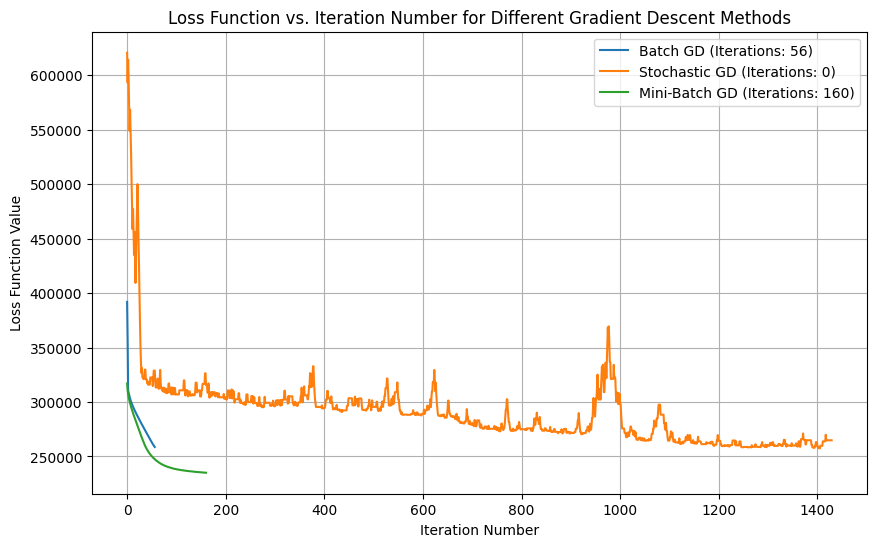

In [7]:
# Q1.4 Your code starts here

eta_bgd = 3e-7
epsilon_bgd = 0.25

eta_sgd = 0.0001
epsilon_sgd = 0.001

eta_mbgd = 1e-5
epsilon_mbgd = 0.01
batch_size_mbgd = 20

# Run gradient descent variants
w_bgd, b_bgd, loss_history_bgd, iterations_bgd = batch_gradient_descent(X, y, C, eta_bgd, epsilon_bgd)
w_sgd, b_sgd, loss_history_sgd, iterations_sgd = stochastic_gradient_descent(X, y, C, eta_sgd, epsilon_sgd)
w_mbgd, b_mbgd, loss_history_mbgd, iterations_mbgd = mini_batch_gradient_descent(X, y, C, eta_mbgd, epsilon_mbgd, batch_size_mbgd)

# Plotting the loss function vs. iteration number

plt.figure(figsize=(10, 6))
plt.plot(loss_history_bgd, label=f'Batch GD (Iterations: {iterations_bgd})')
plt.plot(loss_history_sgd, label=f'Stochastic GD (Iterations: {iterations_sgd})')
plt.plot(loss_history_mbgd, label=f'Mini-Batch GD (Iterations: {iterations_mbgd})')
plt.xlabel('Iteration Number')
plt.ylabel('Loss Function Value')
plt.title('Loss Function vs. Iteration Number for Different Gradient Descent Methods')
plt.legend()
plt.grid(True)
plt.show()



# Your solution:

The plot and metrics reveal distinct characteristics for each gradient descent variant. Batch Gradient Descent (BGD) converged in just 56 iterations with a final loss of approximately 258,701. Its curve is notably smooth, as BGD uses the entire dataset to calculate gradients, resulting in stable and consistent updates. Although BGD reached convergence quickly in terms of iterations, each iteration is computationally intensive, making this approach more suitable for smaller datasets where full-batch processing is feasible.

Stochastic Gradient Descent (SGD), on the other hand, converged with a much higher final loss of around 264,846, and its curve is highly erratic. This noisiness arises from SGD’s single-sample updates, which introduce high variability in the loss trajectory. Although SGD can achieve faster convergence in terms of time due to low per-iteration cost, the path to convergence is unstable. The immediate convergence (0 iterations in the legend) suggests that the convergence criteria might have been met prematurely, indicating a need for further tuning. SGD is generally advantageous for large datasets but may require careful parameter adjustments to avoid premature or unstable convergence.

Mini-Batch Gradient Descent (MBGD) strikes a balance between BGD and SGD, achieving a lower final loss of around 234,220 over 188 iterations. The MBGD curve is smoother than SGD’s but not as smooth as BGD’s, reflecting the moderate stability gained from using mini-batches. This approach offers an efficient compromise: MBGD allows for more frequent updates than BGD, reducing computational expense per iteration while maintaining a reasonably stable convergence path. The combination of stable convergence and manageable computational load makes MBGD a suitable choice, especially for large datasets where full-batch updates would be impractical.



---



---

# Q2: Implementing Batch Naive Bayes (20pt)

Implement a multinomial naive Bayes classifier in the `NaiveBayes` class.  Your implementation should support add-one smoothing. Whether or not to use add-one smoothing is controlled via an argument to the constructor; add-one smoothing is enabled by default.

-  `__init(useAddOneSmoothing=True)__` : constructor.

- `fit(X,Y)`: method to train the naive Bayes model.

- `predict(X)`: method to use the trained naive Bayes model for prediction.

- `predictProbs(X)`: outputs a matrix of predicted posterior class probabilities.


The training data for multinomial naive Bayes is specified as feature counts: `X[i,j]` is the number of times
feature $j$ occurs in instance $i$ (or you can think of it as that instance $i$ is characterized by a particular
real-valued amount of feature $j$).

We are here using the multinomial distribution. Suppose our dataset has $D$ features and $K$ classes. Then the
multinomial distribution for a particular sample $({x},y)$, where ${x}=[x_1,\dots, x_D]\in b{R}^D$, $x_j\in b{N}$ for $j=1,\dots, D$ and $y\in \{1,\dots, K\}$ is
\begin{align}
p({x}|y) = \frac{(\sum_j x_j)! }{x_1! x_2! \dots x_D!} p_{y1}^{x_1}p_{y2}^{x_2}\dots p_{yD}^{x_D}
\end{align}
and the label distribution $p(y)$ (in this case, a categorical distribution) is $\pi=[\pi_1, \dots, \pi_K]$.

The naive Bayes assumption (that each instance is independent given the class label) is used in the sense that
that we are assuming the generative process is

- Picking a class $y$ according to the label distribution
$p(y)$.

- Generate a sequence of features, independently according to a multinomial distribution conditioned on the class $y$: ${p}_y=(p_{y1}, p_{y2}, \dots, p_{yD})$ with $\sum_j p_{yj}=1$.

What you are given is the count of each feature generated by this process stored in a vector ${x}$. This is a useful model for predicting, say, document classes, where $d$ is size of vocabulary
and $K$ is number of document classes.

The MLE parameter estimation for this naive Bayes probabilistic model is
- The label distribution $\hat{p}(y)=\hat{\pi}$
\begin{align}
\hat{{\pi}} = \frac{N_c}{N}
\end{align}
where $N_c$ is the number of samples with label $y=c$ and $N$ is the total samples.

- The multinormial distribution with label $y=c$ is $\hat{{p}}_c=[\hat{p}_{c1}, \dots, \hat{p}_{cD}]$ and
\begin{align}
\hat{p}_{cj}  =\frac{N_{cj}}{N_c}
\end{align}
where $N_{cj}$ is total occurrences of feature $j$ in samples with label $y=c$.


- When using add-one smoothing, we estimate $\hat{p}_{cj} $ with
\begin{align}
\hat{p}_{cj}  = \frac{N_{cj}+1}{N_c +D}
\end{align}

During prediction, given feature count vector ${x}$, we estimate label $y$ posterior probability with
\begin{align}
\hat{p}(y|{x})\propto \hat{p}(y)\hat{p}_{y1}^{x_1}\hat{p}_{y2}^{x_2}\dots \hat{p}_{yD}^{x_D}
\end{align}
up to normalization. You might want to implement the equation above with summation of log probabilities
for better numerical stability. If you choose to do so, you would need another **numerical trick** below.

After
obtaining the log probabilities for each classes, ${z}=\log \hat{p}(y=1|{x}),\log \hat{p}(y=2|{x}), \dots, \log \hat{p}(y=K|{x}) $. The actual probability distribution to be output is
\begin{align}
p(y=c|{x}) &=\frac{\exp(z_c)}{\sum_{c=1}^K \exp(z_c)}\\
&= \frac{\exp(z_c-z)}{\sum_{c=1}^K \exp(z_c-z)}
\end{align}
where $z=\max_c z_c$. Here we subtract $\max_c z_c$ from the log probabilities for better numerical stability.

The `predictProbs(X)` function takes in a matrix $X$ of $N$ instances and outputs an $N\times K$ matrix of posterior
probabilities. Each row $i$ of the returned matrix represents the posterior probability distribution over the $K$
classes for the $i$-th training instance. (Note that each row of the returned matrix will sum to 1.)

In [8]:
class NaiveBayes:

    def __init__(self, useAddOneSmoothing=True):
        """
        Constructor
        """
        # TODO
        self.useAddOneSmoothing = useAddOneSmoothing
        self.class_priors = None  # Store class prior probabilities π_c
        self.feature_probs = None  # Store feature probabilities p(y|x)
        self.classes = None  # Store the unique classes in the dataset
        self.n_classes = None  # Number of classes
        self.n_features = None  # Number of features

    def fit(self, X, y):
        """
        Trains the model
        Arguments:
            X is a n-by-d numpy array
            y is an n-dimensional numpy array
        """
        # TODO
        # Hint: np.unique and np logical functions (logical_and/or/not) may be helpful to your implementation

        self.classes, class_counts = np.unique(y, return_counts=True)
        self.n_classes = len(self.classes)
        self.n_features = X.shape[1]

        # Compute class priors π_c = N_c / N
        self.class_priors = class_counts / y.size

        # Initialize feature probabilities array
        self.feature_probs = np.zeros((self.n_classes, self.n_features))

        # Compute the feature probabilities for each class
        for idx, cls in enumerate(self.classes):
            X_cls = X[y == cls]  # Select all instances of class `cls`
            feature_counts = np.sum(X_cls, axis=0)  # Total count of each feature for class `cls`
            N_c = np.sum(feature_counts)  # Total feature occurrences for class `cls`

            if self.useAddOneSmoothing:
                # Add-one smoothing: p_cj = (N_cj + 1) / (N_c + D)
                self.feature_probs[idx, :] = (feature_counts + 1) / (N_c + self.n_features)
            else:
                # Without smoothing: p_cj = N_cj / N_c
                self.feature_probs[idx, :] = feature_counts / N_c

    def predict(self, X):
        """
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy array
        Returns:
            an n-dimensional numpy array of the predictions
        """
        # TODO

        log_probs = self._compute_log_probs(X)  # Compute log probabilities for numerical stability
        return self.classes[np.argmax(log_probs, axis=1)]  # Select the class with the highest log probability

    def predictProbs(self, X):
        """
        Used the model to predict a vector of class probabilities for each instance in X
        Arguments:
            X is a n-by-d numpy array
        Returns:
            an n-by-K numpy array of the predicted class probabilities (for K classes)
        """
        log_probs = self._compute_log_probs(X)  # Compute log probabilities
        z_max = np.max(log_probs, axis=1, keepdims=True)  # For numerical stability
        exp_probs = np.exp(log_probs - z_max)  # Subtract z_max to avoid overflow
        return exp_probs / np.sum(exp_probs, axis=1, keepdims=True)  # Normalize to get probabilities
        # TODO

    def _compute_log_probs(self, X):
        """
        Helper function to compute the log probabilities for each class.
        Arguments:
            X: n-by-d numpy array of feature counts
        Returns:
            An n-by-K numpy array of log probabilities for each class
        """
        log_class_priors = np.log(self.class_priors)  # Log of class priors π_c
        log_feature_probs = np.log(self.feature_probs)  # Log of feature probabilities p_cj

        # Compute log probabilities: log(π_c) + sum(log(p_cj) * x_j)
        return X @ log_feature_probs.T + log_class_priors

In [9]:
from sklearn import datasets
from sklearn.metrics import accuracy_score

# load the data set
dataset = datasets.load_digits()
X = dataset.data
y = dataset.target

n, d = X.shape
nTrain = int(0.5*n)  # training on 50% of the data

# shuffle the data
idx = np.arange(n)
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# split the data
Xtrain = X[:nTrain, :]
ytrain = y[:nTrain]
Xtest = X[nTrain:, :]
ytest = y[nTrain:]


# train the naive Bayes
modelNB = NaiveBayes(useAddOneSmoothing=True)
modelNB.fit(Xtrain, ytrain)

# output predictions on the remaining data
ypred_NB = modelNB.predict(Xtest)

# calculate the posterior probability
yposterior_NB = modelNB.predictProbs(Xtest)

# compute the training accuracy of the model
accuracyNB = accuracy_score(ytest, ypred_NB)

print("Naive Bayes Accuracy = " + str(accuracyNB))


Naive Bayes Accuracy = 0.8909899888765295




---



---


# Q3: Decision Trees (30pt)

In this question we are going to focus on decision trees, manually follow the algorithm, and investigate the decisions the algorithm makes. Our goal is to justify the steps of the algorithm and investigate the redundancy in the space of decision trees. Consider the following decision tree:


<img src="https://github.com/yexf308/MachineLearning/blob/main/homework/HW3/Decision_tree1.png?raw=true" width="400" />

## Q3.1 Decision Boundaries  (5pt)
 Draw the decision boundaries defined by this tree. Each leaf of the tree is labeled with a letter. Write this letter in the corresponding region of instance space and label the axes. Your solution should look like Next Figure, where you will replace the boundary thresholds and labels based on the provided decision tree.

 <img src="https://github.com/yexf308/MachineLearning/blob/main/homework/HW3/Decision_tree2.png?raw=true" width="200" />

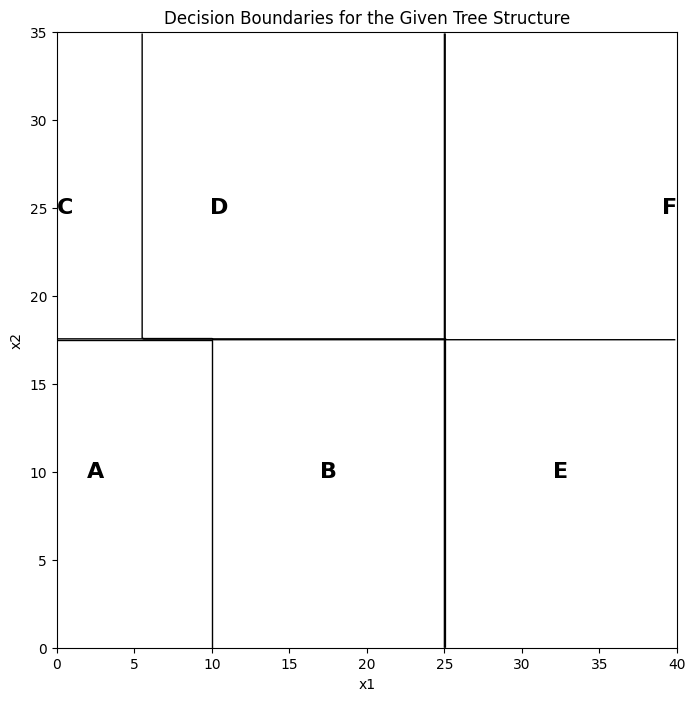

In [10]:
# Define points and labels that represent the regions
X = np.array([
    [2.5, 10],    # Region A (x1 < 10 and x2 < 15)
    [17.5, 10], # Region B (10 <= x1 < 25 and x2 < 15)
    [0.5, 25],  # Region C (x1 < 5 and x2 >= 15)
    [10.5, 25],   # Region D (5 <= x1 < 25 and x2 >= 15)
    [32.5, 10], # Region E (x1 >= 25 and x2 < 15)
    [39.5, 25]  # Region F (x1 >= 25 and x2 >= 15)
])
y = np.array([0, 1, 2, 3, 4, 5])  # Labels for regions A, B, C, D, E, F

# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

# Define mesh grid for plotting
x_min, x_max = 0, 40
y_min, y_max = 0, 35
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict over mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundaries
plt.figure(figsize=(8, 8))
plt.contour(xx, yy, Z, levels=np.unique(Z), colors='black', linewidths=1)

# Add region labels
region_labels = ['A', 'B', 'C', 'D', 'E', 'F']
for i, txt in enumerate(region_labels):
    plt.text(X[i, 0], X[i, 1], txt, fontsize=16, ha='center', va='center', fontweight='bold', color='black')

# Set limits and labels
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Decision Boundaries for the Given Tree Structure")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()


# Your solution:

Resulting Regions:

- **Region A**: Bottom left, $ x_1 < 10 $ and $ x_2 < 15 $
- **Region B**: Between $ x_1 = 10 $ and $ x_1 = 25 $, and $ x_2 < 15 $
- **Region C**: Top left, $ x_1 < 5 $ and $ x_2 \geq 15 $
- **Region D**: Between $ x_1 = 5 $ and $ x_1 = 25 $, and $ x_2 \geq 15 $
- **Region E**: Bottom right, $ 25 \leq x_1 \leq 40 $ and $ x_2 < 15 $
- **Region F**: Top right,  $ 25 \leq x_1 \leq 40 $ and $ x_2 \geq 15 $






---

## Q3.2 Decision Boundaries  (5pt)
Give another decision tree that is different from decision tree in first Figure but defines the same decision boundaries. This demonstrates that the space of decision trees is syntactically redundant. Would this redundancy affect the accuracy of the learned trees? What are potential benefits of this redundancy? (i.e., Does it increase the computational complexity of finding an accurate tree?) Explain using 3-5 sentences.

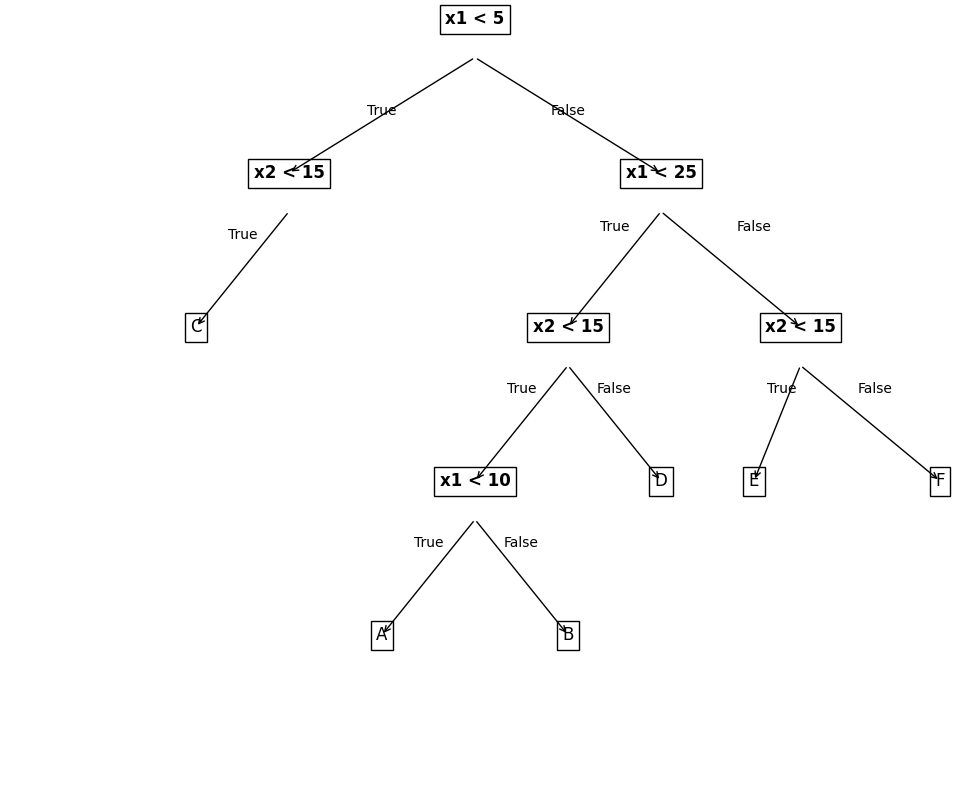

In [11]:
# Set up the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Root node
ax.text(0.5, 1.0, "x1 < 5", ha="center", va="center", fontsize=12, fontweight='bold', bbox=dict(facecolor="white", edgecolor="black"))

# Left child of x1 < 5
ax.text(0.3, 0.8, "x2 < 15", ha="center", va="center", fontsize=12, fontweight='bold', bbox=dict(facecolor="white", edgecolor="black"))
ax.annotate("", xy=(0.3, 0.8), xytext=(0.5, 0.95), arrowprops=dict(arrowstyle="->", lw=1))
ax.text(0.4, 0.88, "True", ha="center", va="center", fontsize=10)

# Left child of x2 < 15 (leaf node C)
ax.text(0.2, 0.6, "C", ha="center", va="center", fontsize=12, bbox=dict(facecolor="white", edgecolor="black"))
ax.annotate("", xy=(0.2, 0.6), xytext=(0.3, 0.75), arrowprops=dict(arrowstyle="->", lw=1))
ax.text(0.25, 0.72, "True", ha="center", va="center", fontsize=10)

# Right child of x1 < 5
ax.text(0.7, 0.8, "x1 < 25", ha="center", va="center", fontsize=12, fontweight='bold', bbox=dict(facecolor="white", edgecolor="black"))
ax.annotate("", xy=(0.7, 0.8), xytext=(0.5, 0.95), arrowprops=dict(arrowstyle="->", lw=1))
ax.text(0.6, 0.88, "False", ha="center", va="center", fontsize=10)

# Left child of x1 < 25
ax.text(0.6, 0.6, "x2 < 15", ha="center", va="center", fontsize=12, fontweight='bold', bbox=dict(facecolor="white", edgecolor="black"))
ax.annotate("", xy=(0.6, 0.6), xytext=(0.7, 0.75), arrowprops=dict(arrowstyle="->", lw=1))
ax.text(0.65, 0.73, "True", ha="center", va="center", fontsize=10)

# Left child of x2 < 15
ax.text(0.5, 0.4, "x1 < 10", ha="center", va="center", fontsize=12, fontweight='bold', bbox=dict(facecolor="white", edgecolor="black"))
ax.annotate("", xy=(0.5, 0.4), xytext=(0.6, 0.55), arrowprops=dict(arrowstyle="->", lw=1))
ax.text(0.55, 0.52, "True", ha="center", va="center", fontsize=10)

# Left child of x1 < 10 (leaf node A)
ax.text(0.4, 0.2, "A", ha="center", va="center", fontsize=12, bbox=dict(facecolor="white", edgecolor="black"))
ax.annotate("", xy=(0.4, 0.2), xytext=(0.5, 0.35), arrowprops=dict(arrowstyle="->", lw=1))
ax.text(0.45, 0.32, "True", ha="center", va="center", fontsize=10)

# Right child of x1 < 10 (leaf node B)
ax.text(0.6, 0.2, "B", ha="center", va="center", fontsize=12, bbox=dict(facecolor="white", edgecolor="black"))
ax.annotate("", xy=(0.6, 0.2), xytext=(0.5, 0.35), arrowprops=dict(arrowstyle="->", lw=1))
ax.text(0.55, 0.32, "False", ha="center", va="center", fontsize=10)

# Right child of x2 < 15 (leaf node D)
ax.text(0.7, 0.4, "D", ha="center", va="center", fontsize=12, bbox=dict(facecolor="white", edgecolor="black"))
ax.annotate("", xy=(0.7, 0.4), xytext=(0.6, 0.55), arrowprops=dict(arrowstyle="->", lw=1))
ax.text(0.65, 0.52, "False", ha="center", va="center", fontsize=10)

# Right child of x1 < 25
ax.text(0.85, 0.6, "x2 < 15", ha="center", va="center", fontsize=12, fontweight='bold', bbox=dict(facecolor="white", edgecolor="black"))
ax.annotate("", xy=(0.85, 0.6), xytext=(0.7, 0.75), arrowprops=dict(arrowstyle="->", lw=1))
ax.text(0.8, 0.73, "False", ha="center", va="center", fontsize=10)

# Left child of right x2 < 15 (leaf node E)
ax.text(0.8, 0.4, "E", ha="center", va="center", fontsize=12, bbox=dict(facecolor="white", edgecolor="black"))
ax.annotate("", xy=(0.8, 0.4), xytext=(0.85, 0.55), arrowprops=dict(arrowstyle="->", lw=1))
ax.text(0.83, 0.52, "True", ha="center", va="center", fontsize=10)

# Right child of right x2 < 15 (leaf node F)
ax.text(1.0, 0.4, "F", ha="center", va="center", fontsize=12, bbox=dict(facecolor="white", edgecolor="black"))
ax.annotate("", xy=(1.0, 0.4), xytext=(0.85, 0.55), arrowprops=dict(arrowstyle="->", lw=1))
ax.text(0.93, 0.52, "False", ha="center", va="center", fontsize=10)

# Remove axes for a cleaner look
ax.axis('off')

plt.show()


# Your solution:

This redundancy in the structure of decision trees does not affect the accuracy of the learned trees, as they ultimately define the same decision boundaries and lead to the same classification outcomes. However, syntactic redundancy can increase the computational complexity of finding an optimal tree, as the algorithm may explore multiple equivalent trees.



---


## Q3.3 Building A Decision Tree (5pt)
Consider the training samples in next Figure, where A, B, C denote three different features and Y denotes the output we want to predict:


<img src="https://github.com/yexf308/MachineLearning/blob/main/homework/HW3/Decision_tree3.png?raw=true" width="200" />

What feature would be chosen for the split at the root of a decision tree using the Information Gain criterion? Please show your calculations and explain your reasoning. What is the relationship between the selected feature and outcome Y?

# Your solution:

To determine which feature should be chosen for the split at the root of a decision tree using the Information Gain criterion, let's go through the calculations. We’ll calculate the information gain for each feature $A$, $B$, and $C$ with respect to the target outcome $Y$.

1. Calculate the Entropy of $Y$:

Entropy $H(Y)$ measures the amount of uncertainty in $Y$ and is calculated as:
$
H(Y) = -p_0 \log_2(p_0) - p_1 \log_2(p_1)
$
where:
- $p_0$ is the proportion of samples where $Y = 0$
- $p_1$ is the proportion of samples where $Y = 1$

From the table:
- There are 3 samples with $Y = 0$ and 3 samples with $Y = 1$.
  
Thus:
$
p_0 = \frac{3}{6} = 0.5 \quad \text{and} \quad p_1 = \frac{3}{6} = 0.5
$

So, the entropy $H(Y)$ is:
$
H(Y) = -0.5 \log_2(0.5) - 0.5 \log_2(0.5) = 1
$

2. Calculate Conditional Entropy $H(Y|X)$ for Each Feature:

Next, we’ll calculate the conditional entropy $H(Y|A) ,  H(Y|B) , and H(Y|C) $.

#### For Feature $A$

Divide the dataset based on the values of $A$:
- When $A = 0 : Y = [0, 0, 1]$
  - $p_0 = \frac{2}{3}, p_1 = \frac{1}{3} $
  - $ H(Y|A=0) = -\frac{2}{3} \log_2\left(\frac{2}{3}\right) - \frac{1}{3} \log_2\left(\frac{1}{3}\right) \approx 0.918 $

- When $A = 1 :  Y = [0, 1, 1]$
  - $p_0 = \frac{1}{3}, p_1 = \frac{2}{3} $
  - $ H(Y|A=1) = -\frac{1}{3} \log_2\left(\frac{1}{3}\right) - \frac{2}{3} \log_2\left(\frac{2}{3}\right) \approx 0.918 $

Calculate the weighted entropy for $ A $:
$
H(Y|A) = \frac{3}{6} \cdot 0.918 + \frac{3}{6} \cdot 0.918 = 0.918
$

Then, the information gain $ IG(Y|A) $ is:
$
IG(Y|A) = H(Y) - H(Y|A) = 1 - 0.918 = 0.082
$

#### For Feature $ B $

Divide the dataset based on the values of $ B $:
- When $ B = 0 : Y = [0, 1]$
  - $ p_0 = \frac{1}{2} $, $ p_1 = \frac{1}{2} $
  -  $ H(Y|B=0) = -\frac{1}{2} \log_2\left(\frac{1}{2}\right) - \frac{1}{2} \log_2\left(\frac{1}{2}\right) \approx 1 $

- When $B = 1 :  Y = [0, 0, 1, 1]$
  - $ p_0 = \frac{2}{4} $ , $ p_1 = \frac{2}{4} $
  - $ H(Y|B=0) = -\frac{2}{4} \log_2\left(\frac{2}{4}\right) - \frac{2}{4} \log_2\left(\frac{2}{4}\right) \approx 1 $

Calculate the weighted entropy for $ B $:
$
H(Y|B) = \frac{2}{6} \cdot 1 + \frac{4}{6} \cdot 1 = 1
$

Then, the information gain $ IG(Y|B) $ is:
$
IG(Y|B) = H(Y) - H(Y|B) = 1 - 1 = 0
$

#### For Feature $ C $

Divide the dataset based on the values of $ C $:
- When $ C = 0 : Y = [1, 1, 1]$
  - $ p_0 = 0, p_1 = 1 $
  - $ H(Y|C=0) = 0 $

- When $ C = 1 :  Y = [0, 0, 0]$
  - $ p_0 = 1, p_1 = 0 $
  - $ H(Y|C=1) = 0 $

Calculate the weighted entropy for $ C $:
$
H(Y|C) = \frac{3}{6} \cdot 0 + \frac{3}{6} \cdot 0 = 0
$

Then, the information gain $ IG(Y|C) $ is:
$
IG(Y|C) = H(Y) - H(Y|C) = 1 - 0 = 1
$

3. Determine the Best Feature for the Root Split

The information gains for each feature are:
- $ IG(Y|A) = 0.082 $
- $ IG(Y|B) = 0 $
- $ IG(Y|C) = 1 $

Since $ C $ has the highest information gain of 1, it can be chosen as the root feature. This means that $ C $ is perfectly predictive of $ Y $ in this dataset, and a split on this feature will completely separate the classes.

Relationship Between the Selected Feature and Outcome $ Y $

In this dataset, $ C $ has a direct and deterministic relationship with $ Y $. Specifically:
- When $C = 0 $, $ Y = 1 $.
- When $ C = 1 $, $ Y = 0 $.





---


## Q3.4 Random Splitting  (10pt)
In the basic decision tree algorithm, we choose the feature/value pair with the maximum Information Gain (i.e., $IG(Y |X ) = H (Y ) − H (Y |X ))$ as the criterion to use at each internal node of the decision tree. Suppose we modified the algorithm to choose at random from among those feature/value combinations that had non-zero information gain, but that we kept all other parts of the algorithm unchanged.

Prove that if a splitting feature/value combination has non-zero information gain at an internal node, then at least one training example must be sent to each of the child nodes.

**Hint:** You may prove the contrapositive of the statement instead, that is, if all examples are sent to one of the child nodes (they have the same feature/value pair) then the information gain is zero.


# Your solution:

To prove this, let's proceed by proving the contrapositive: if all examples are sent to one of the child nodes (i.e., they all have the same feature value and go to the same child node), then the information gain for that feature/value combination is zero.

Recall that the information gain $IG(Y | X)$ for a feature $X$ on the target $Y$ is defined as:
   $
   IG(Y | X) = H(Y) - H(Y | X)
   $
   where $H(Y)$ is the entropy of the target $Y$, and $H(Y | X)$ is the conditional entropy of \( Y \) given \( X \). The conditional entropy $H(Y | X)$ reflects the expected entropy over the splits induced by the feature $X$.

Conditional Entropy and Pure Split: Suppose that after splitting on a particular feature/value pair, all examples go to one child node, meaning there is no division in the data based on that feature/value combination. In this case:
   - One of the child nodes contains all the examples, and the other is empty.
   - The conditional entropy $H(Y | X)$ is the same as the original entropy $H(Y)$ since there is no reduction in uncertainty about $Y$ based on $X$ (all data goes to one branch, leaving uncertainty unchanged).

Calculation of Information Gain: Since all examples go to one child node, the conditional entropy $H(Y | X)$ remains equal to $H(Y)$, leading to:
   $
   IG(Y | X) = H(Y) - H(Y | X) = H(Y) - H(Y) = 0
   $ \
   Therefore, the information gain is zero if all examples go to one child node.

Conclusion: By the contrapositive argument, we conclude that if a feature/value pair has non-zero information gain (i.e., $IG(Y | X) > 0$ ), then it must be the case that at least one training example is sent to each of the child nodes, ensuring that the split actually reduces the uncertainty about $Y$.

Thus, we have shown that a splitting feature/value combination with non-zero information gain at an internal node must send at least one training example to each of the child nodes.




---


## Q3.5 Random Splitting (5pt)
How do you think this change (i.e., choosing at random from among those feature/value combinations that have non-zero information gain) would affect the ac- curacy of the decision trees produced on average? To achieve the same accuracy, how are the trees different (e.g. size) on average? Why? Explain using 3-5 sentences.

# Your solution:

Average accuracy of decision trees might be reduced when we split randomly from feature/value combinations with non-zero IG. These splits are not informative always. To acheive same accuracy, trees are likely to be larger on average. Additional splits may be required to separate classes effectively, leading to increase in depth of tree and number of nodes. This larger size helps compensate for the reduced precision in each split, allowing the model to approximate the same decision boundaries. However, these deeper trees can increase computational costs and reduce interpretability compared to trees built using optimal information gains splits.